In [25]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from icecream import ic

In [30]:
def parse_fname(file_name):
    fname = os.path.basename(file_name)
    splname = fname.split("_")
    mass = float(splname[3].replace("m","").replace("GeV", ""))
    coupling = float(splname[4].replace("c",""))
    mag_field = float(splname[0].replace("B", ""))
    
    return mass, coupling, mag_field

In [29]:
def get_available_params(rootfile_dir):
    filelist = glob.glob(os.path.join(rootfile_dir, "*.root"))
    avail_masses = set()
    avail_couplings = set()
    avail_magfield = set()
    
    for filename in filelist:
        mass, coupling, mag_field = parse_fname(filename)
        avail_masses.add(mass)
        avail_couplings.add(coupling)
        avail_magfield.add(mag_field)
        
    return avail_masses, avail_couplings, avail_magfield

In [26]:
avail_masses, avail_couplings, avail_magfield = get_available_params("ROOT_Files")

ic(avail_masses)
ic(avail_couplings)
ic(avail_magfield)

ic| avail_masses: {0.3548,

 0.7586, 0.1585, 0.8913, 0.6457, 2.8184, 1.2589, 0.01, 0.0501}
ic| avail_couplings: {1e-08,
                      1.8329807108324374e-08,
                      3.3598182862837814e-08,
                      6.158482110660267e-08,
                      1.1288378916846883e-07,
                      2.06913808111479e-07,
                      3.792690190732254e-07,
                      6.951927961775605e-07,
                      1.2742749857031322e-06,
                      2.335721469090121e-06,
                      4.281332398719396e-06,
                      7.847599703514607e-06,
                      1.438449888287663e-05,
                      2.6366508987303556e-05,
                      4.8329302385717524e-05,
                      8.858667904100833e-05,
                      0.0001623776739188721,
                      0.00029763514416313193,
                      0.0005455594781168515,
                      0.001}
ic| avail_magfield: {100.0}


{100.0}

In [32]:
def get_separations(root_file):
    data = uproot.open(root_file)
    tracking_stations = [data[tree] for tree in data.keys()]
    seperations_array = []
    for station in tracking_stations:
        hits = station.arrays(station.keys(), library="np")
        delta_x = np.abs(hits["em_x"] - hits["ep_x"])
        delta_y = np.abs(hits["em_y"] - hits["ep_y"])
        track_separations = np.sqrt(delta_x**2 + delta_y**2)
        seperations_array.append(track_separations)
    
    return seperations_array

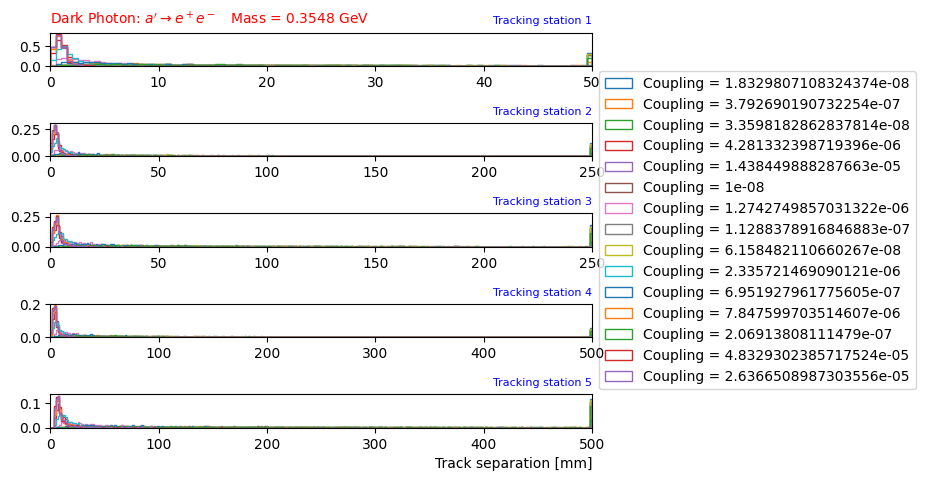

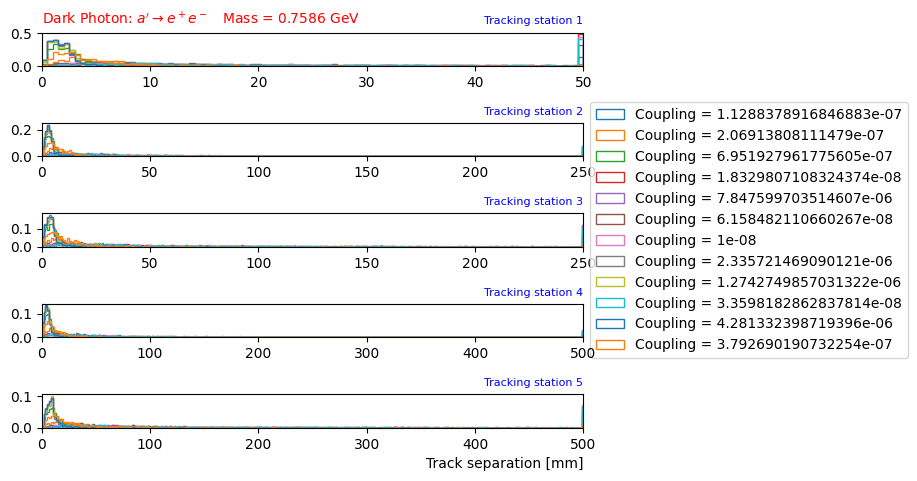

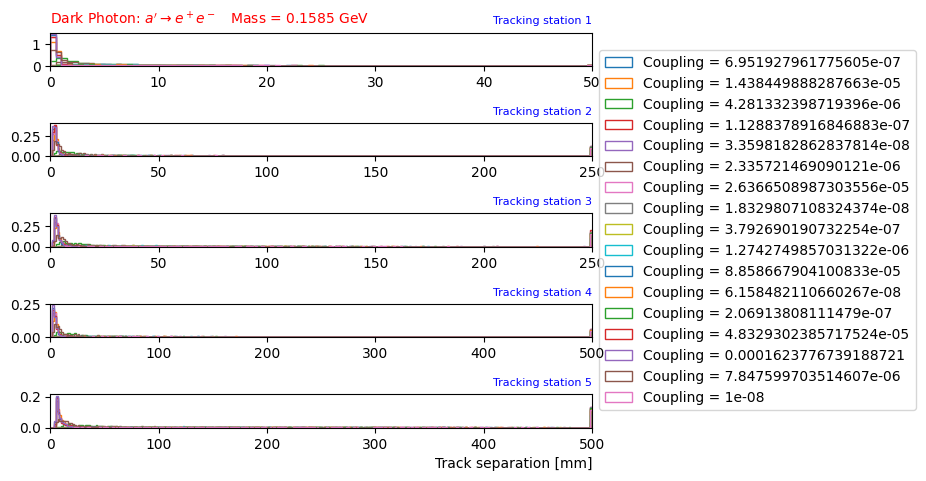

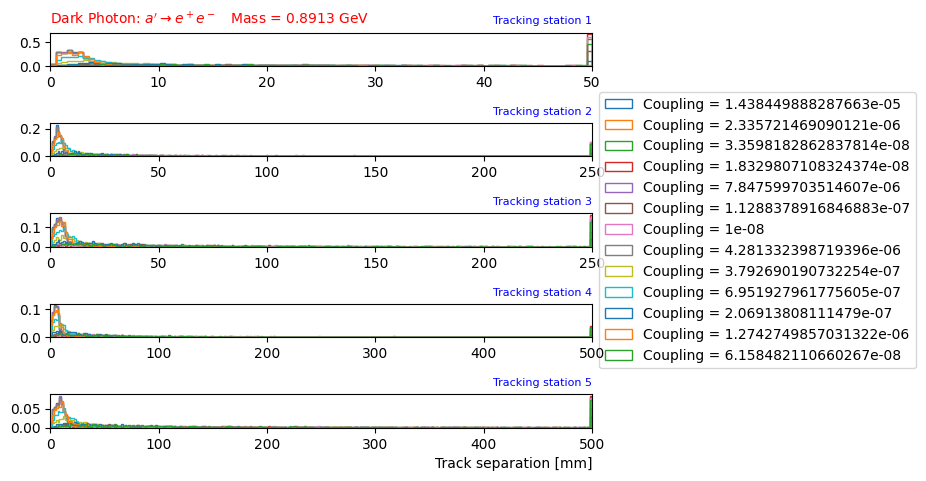

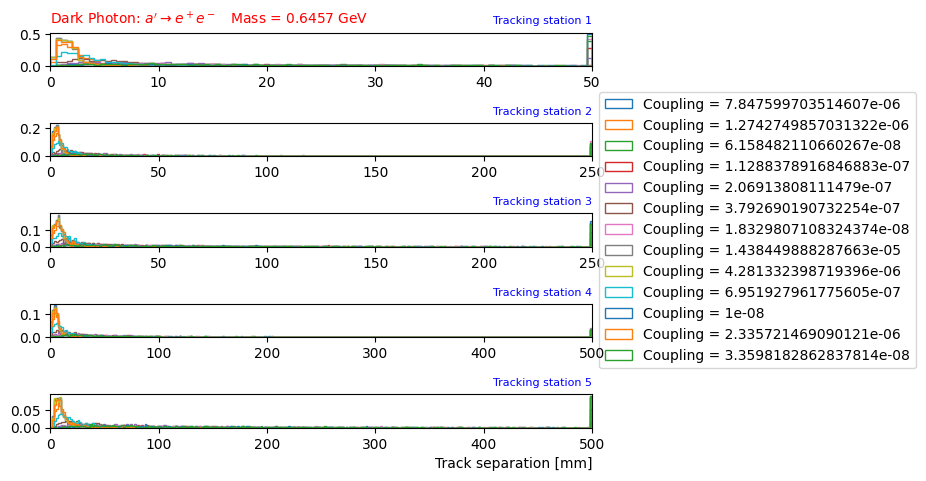

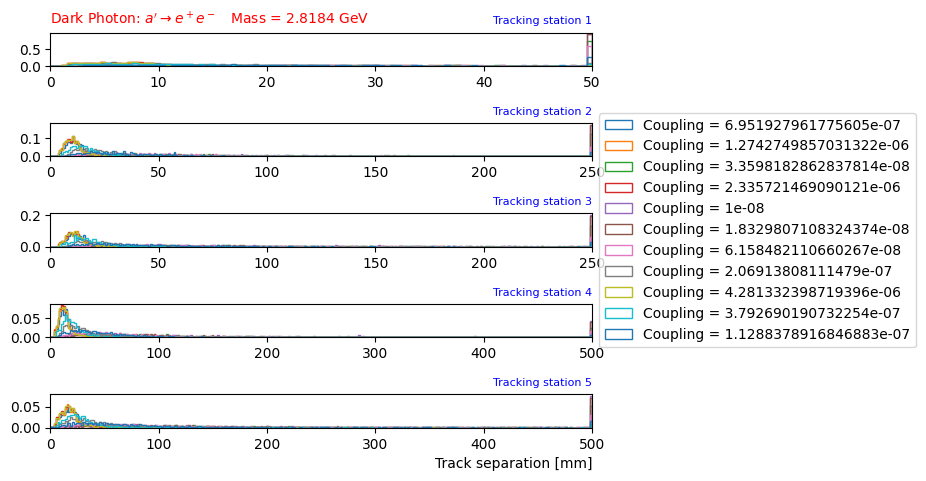

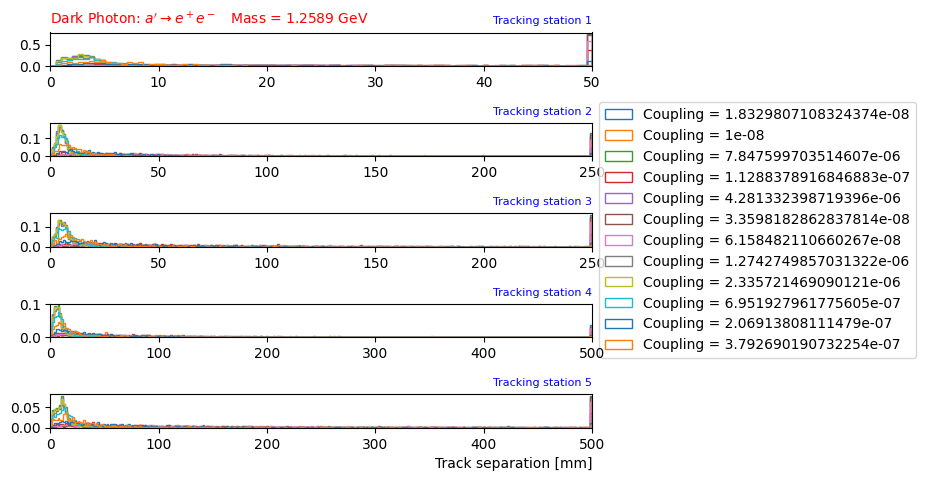

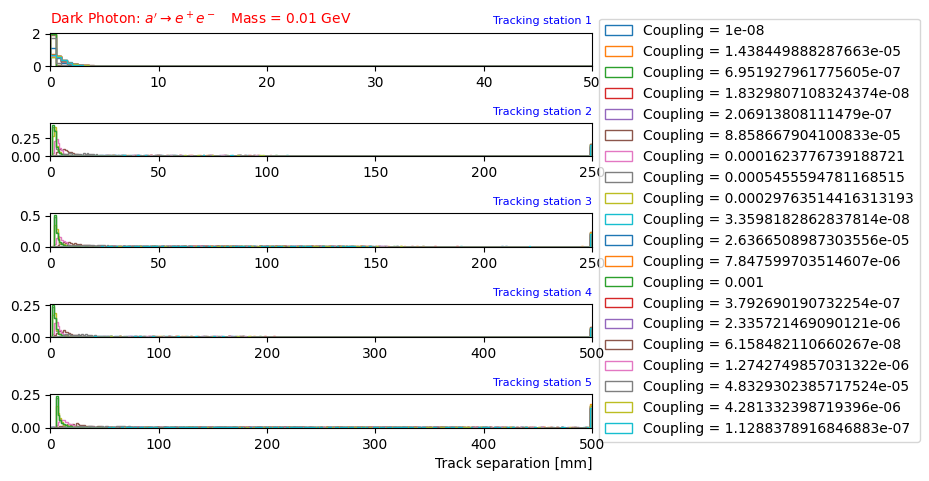

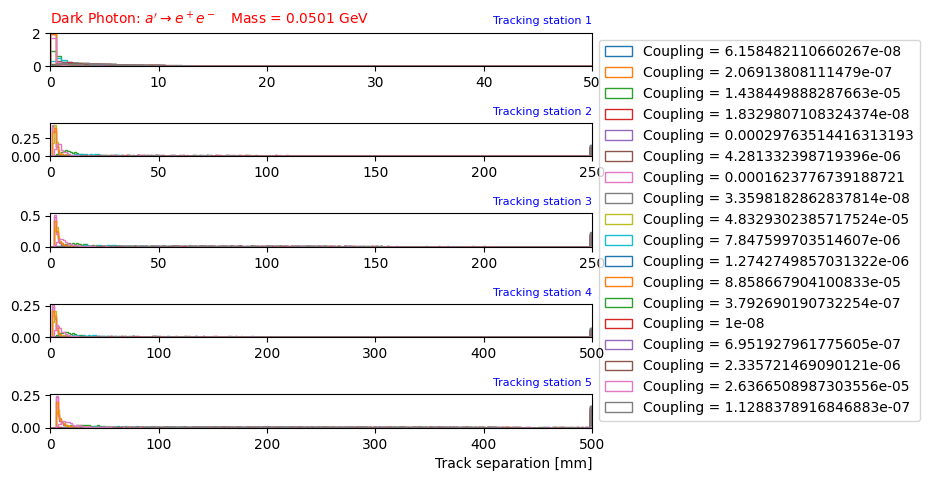

In [50]:
for mass in avail_masses:
    root_files = glob.glob(f"ROOT_Files/*{mass}*.root")
    
    separations = [get_separations(f) for f in root_files]
    
    nrows=len(separations[0])
    fig, ax = plt.subplots(nrows=nrows)
    plt.tight_layout(pad=2)

    bins_arr = [100, 300, 300, 300, 300]
    xlims = [50, 250, 250, 500, 500]

    ax[0].set_title(r"Dark Photon: $a' \rightarrow e^+ e ^-$"  + f"   Mass = {mass} GeV", loc="left", color="red", fontsize="10")
    ax[nrows-1].set_xlabel("Track separation [mm]", loc='right')  # I think units are mm
    
    for fname, seperations_array in zip(root_files, separations):
        for i, separation in enumerate(seperations_array):
            mass, coupling, mag_field = parse_fname(fname)
            # ax[i].hist(separation, bins=bins[i], histtype="step", density=True, label=f"Coupling = {coupling}")
            bins = np.linspace(0, xlims[i], bins_arr[i])
            ax[i].hist(np.clip(separation, bins[0], bins[-1]), bins=bins, histtype="step", density=True, label=f"Coupling = {coupling}")
            ax[i].set_title(f"Tracking station {i+1}", loc="right", color="blue", fontsize=8)
            ax[i].set_xlim([0, xlims[i]])
            # ax[i].set_xlim([0, 2000])
            # ax[i].set_xscale("log")
    # plt.savefig("DarkPhoton_epem_track_separation.pdf")
    ax[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()


